# Section 1: Dataset Loading & Initial Data Understanding

In [9]:
# 
# Applied Machine Learning Coursework
# Stock Market Sentiment Analysis
# Section 1: Dataset Loading and Data Understanding
# 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Load the Dataset

In [11]:
# Loading the dataset
import pandas as pd
df=pd.read_csv ("stock_data.csv")

# Displaying first 5 records
df.head()

,Text,Sentiment
0,user wouldn't consider it until >27 minimum CF,-1.0
1,IDCC Breakout on either side on closing basis ...,1.0
2,GOOG trying some short here around 809,-1.0
3,Many small businesses in the U.S. were vulnera...,-1.0
4,INFN taking some off here,1.0


## 1.2 Dataset Overview

In [13]:
# Checking dataset shape (rows, columns)
df.shape

(7370, 2)

In [14]:
# Displaying column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       7305 non-null   object 
 1   Sentiment  7305 non-null   float64
dtypes: float64(1), object(1)
memory usage: 115.3+ KB


## 1.3 Basic Statistical Summary

In [16]:
# Checking sentiment distribution
df['Sentiment'].value_counts()

Sentiment
 1.0    3657
-1.0    3648
Name: count, dtype: int64

In [17]:
# Checking percentage distribution of sentiment labels
df['Sentiment'].value_counts(normalize=True) * 100

Sentiment
 1.0    50.061602
-1.0    49.938398
Name: proportion, dtype: float64

## 1.4 Missing Values

In [19]:
# Checking for missing values
df.isnull().sum()

Text         65
Sentiment    65
dtype: int64

In [20]:
# Droping rows with any missing values
df= df.dropna()

## 1.5 Class Balance Analysis

In [22]:
# Counting of each sentiment class
sentiment_counts = df['Sentiment'].value_counts()
# Displaying counts
sentiment_counts

Sentiment
 1.0    3657
-1.0    3648
Name: count, dtype: int64

### 1.5.1 Percentage Distribution

In [24]:
# Percentage distribution of sentiment classes
sentiment_percentage = df['Sentiment'].value_counts(normalize=True) * 100
sentiment_percentage

Sentiment
 1.0    50.061602
-1.0    49.938398
Name: proportion, dtype: float64

### 1.5.2 Visualizing Class Distribution

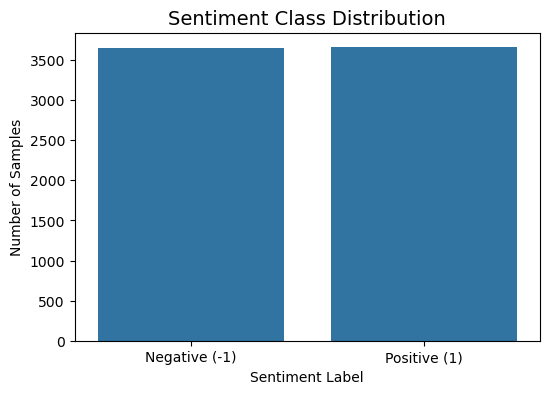

In [26]:
# Ploting class distribution
plt.figure(figsize=(6,4))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values
)
plt.title("Sentiment Class Distribution", fontsize=14)
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Samples")
plt.xticks([0,1], ['Negative (-1)', 'Positive (1)'])
plt.show()

### 1.5.3: Automated Class Balance Check

In [28]:
def check_dataset_balance(labels, threshold=0.20):
    """
    Checking whether a dataset is balanced based on class distribution.
    
    Parameters:
    labels (pd.Series): Target label column
    threshold (float): Maximum allowed difference ratio (default = 20%)
    
    Returns:
    None (prints balance status)
    """
    # Calculating class distribution
    class_dist = labels.value_counts(normalize=True)
    
    # Computing imbalance ratio
    imbalance_ratio = class_dist.max() - class_dist.min()
    
    print("Class Distribution (Percentage):")
    print((class_dist * 100).round(2))
    
    print("\nImbalance Ratio:", round(imbalance_ratio * 100, 2), "%")
    
    # Balance decision
    if imbalance_ratio <= threshold:
        print("\n Dataset is BALANCED.")
    else:
        print("\n Dataset is IMBALANCED.")

# Run balance check
check_dataset_balance(df['Sentiment'])


Class Distribution (Percentage):
Sentiment
 1.0    50.06
-1.0    49.94
Name: proportion, dtype: float64

Imbalance Ratio: 0.12 %

 Dataset is BALANCED.


# Section 2: Data Cleaning and Text Preprocessing

## 2.1 Import Required Libraries

In [31]:
#
# Section 2: Data Cleaning and Text Preprocessing
# 

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading required NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## 2.2 Text Cleaning Function
#### This function performs:
#### Lowercasing
#### Removal of URLs
#### Removal of numbers & punctuation
#### Stopword removal
#### Lemmatization

In [33]:
# Initializing lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleaning and preprocessing input text.
    
    Parameters:
    text (str): Raw input text
    
    Returns:
    str: Cleaned and preprocessed text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


## 2.3 Apply Preprocessing to Dataset

In [35]:
# Apply text cleaning to the Text column
df['cleaned_text'] = df['Text'].apply(clean_text)

# Display sample comparison
df[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,user wouldn't consider it until >27 minimum CF,user wouldnt consider minimum cf
1,IDCC Breakout on either side on closing basis ...,idcc breakout either side closing basis may gi...
2,GOOG trying some short here around 809,goog trying short around
3,Many small businesses in the U.S. were vulnera...,many small business u vulnerable even coronavi...
4,INFN taking some off here,infn taking


## 2.4 Text Length Analysis (Before & After Cleaning)

In [37]:
# Text length before cleaning
df['text_length_raw'] = df['Text'].apply(lambda x: len(x.split()))

# Text length after cleaning
df['text_length_cleaned'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Display summary statistics
df[['text_length_raw', 'text_length_cleaned']].describe()

,text_length_raw,text_length_cleaned
count,7305.000000,7305.000000
mean,14.002738,8.601780
std,6.574703,4.009582
min,2.000000,0.000000
25%,9.000000,5.000000
50%,14.000000,8.000000
75%,19.000000,12.000000
max,32.000000,23.000000


## 2.5 Visualization: Text Length Distribution

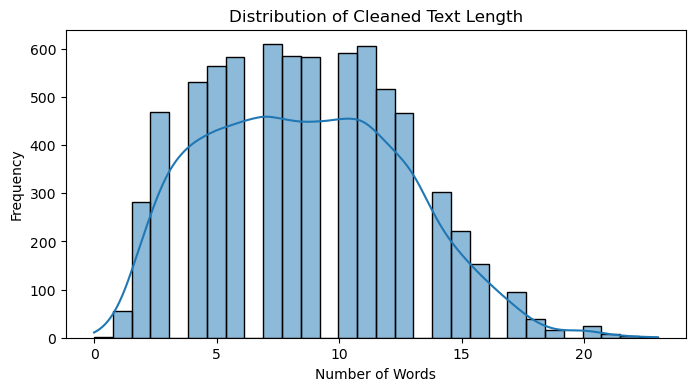

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(df['text_length_cleaned'], bins=30, kde=True)
plt.title("Distribution of Cleaned Text Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Section 3: Exploratory Data Analysis (EDA)

## 3.1 Basic EDA

#### Install Required Libraries

In [43]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Libraries loaded successfully!")

Libraries loaded successfully!


#### 3.1.1 Sentiment Distribution

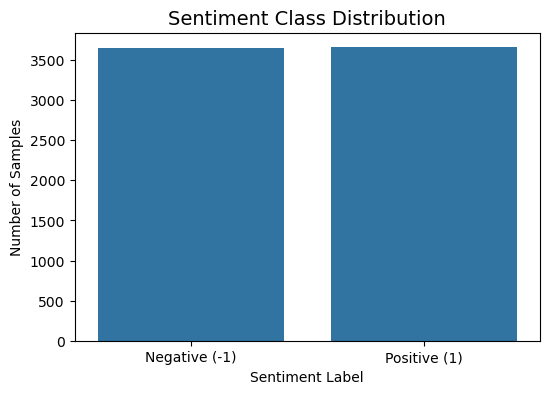

In [45]:
# 
# Section 3.1: Basic Exploratory Data Analysis
# 

# Sentiment count
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values
)

plt.title("Sentiment Class Distribution", fontsize=14)
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Samples")
plt.xticks([0,1], ['Negative (-1)', 'Positive (1)'])
plt.show()


#### 3.1.2 Text Length by Sentiment

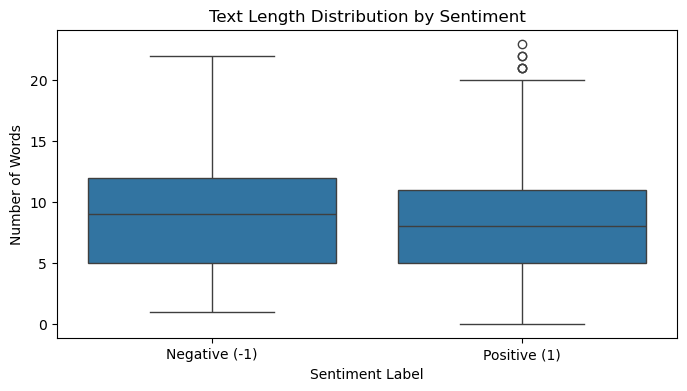

In [47]:
# Text length by sentiment
plt.figure(figsize=(8,4))
sns.boxplot(
    x='Sentiment',
    y='text_length_cleaned',
    data=df
)

plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Words")
plt.xticks([0,1], ['Negative (-1)', 'Positive (1)'])
plt.show()

#### 3.1.3 Most Frequent Words (Overall)

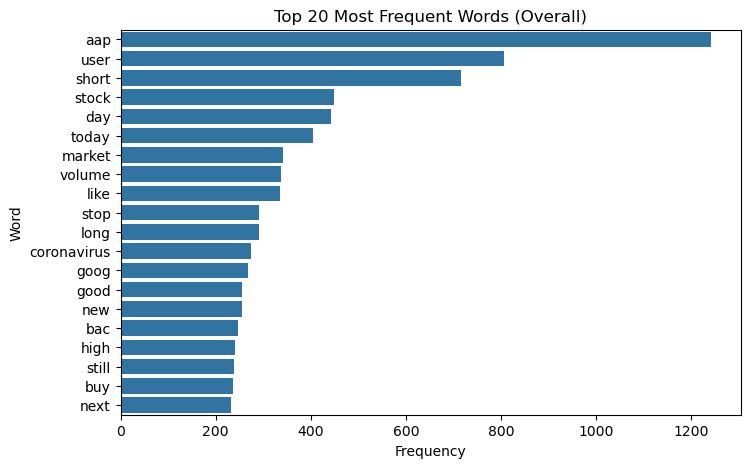

In [49]:
from collections import Counter

# Combine all cleaned text
all_words = ' '.join(df['cleaned_text']).split()

# Get most common words
common_words = Counter(all_words).most_common(20)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x='Frequency',
    y='Word',
    data=common_words_df
)

plt.title("Top 20 Most Frequent Words (Overall)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#### 3.1.4 Overall Word Cloud (All Text)

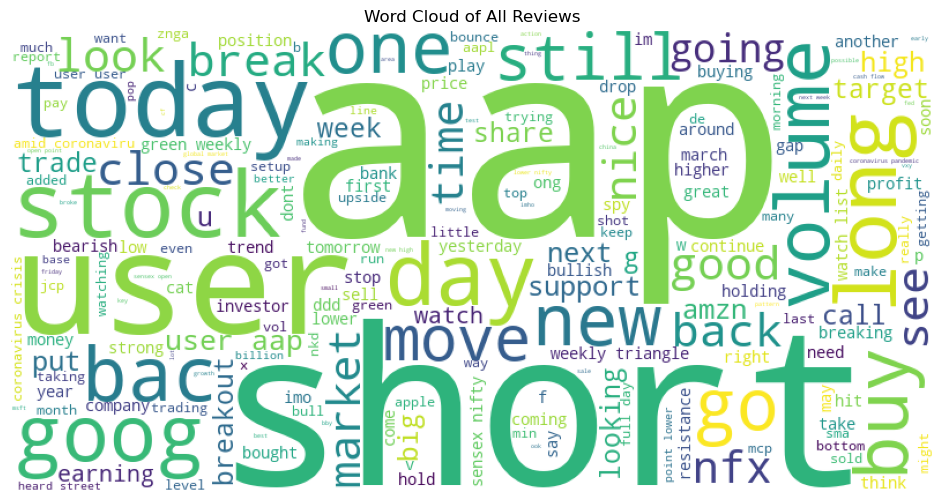

In [53]:
all_text = " ".join(df['cleaned_text']) 

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.to_image())
plt.axis("off")
plt.title("Word Cloud of All Reviews")
plt.show()

#### 3.1.5 Positive Word Cloud

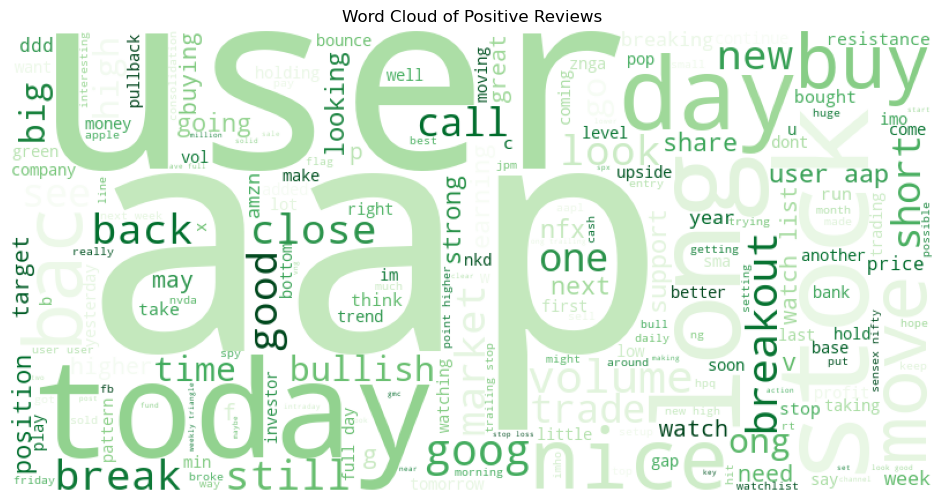

In [55]:
# Create text for positive reviews
positive_text = " ".join(df[df['Sentiment'] == 1]['cleaned_text'])

# Generate word cloud
wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=200
).generate(positive_text)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_pos.to_image())
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()


#### 3.1.6 Negative Word Cloud

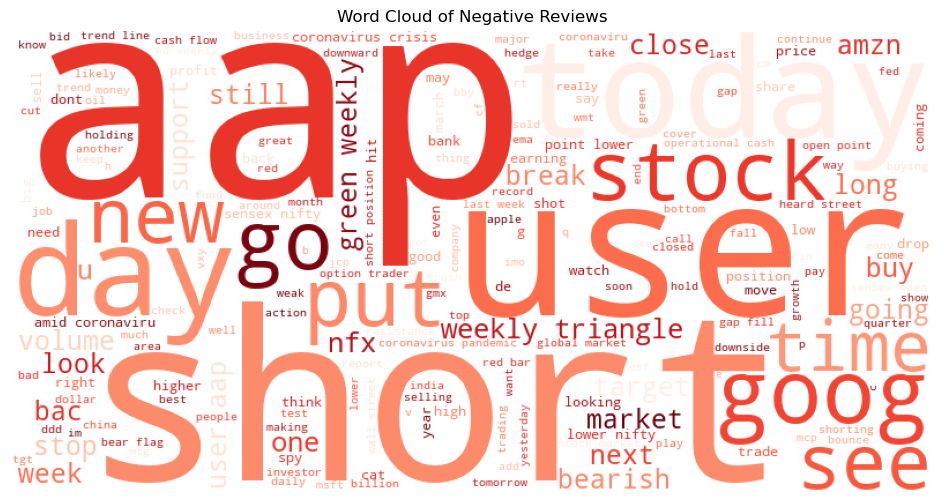

In [57]:
# Create text for negative reviews
negative_text = " ".join(df[df['Sentiment'] == -1]['cleaned_text'])

# Generate word cloud
wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=200
).generate(negative_text)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg.to_image())
plt.axis("off")
plt.title("Word Cloud of Negative Reviews")
plt.show()


# Section 4: Feature Engineering and Data Splitting

## 4.1 Feature and Target Separation

In [60]:
# 
# Section 4: Feature Engineering and Data Splitting
# 

# Feature (independent variable)
X = df['cleaned_text']

# Target (dependent variable)
y = df['Sentiment']

# Verify shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (7305,)
Target shape: (7305,)


## 4.2 Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode target labels
y_encoded = label_encoder.fit_transform(y)

# Mapping check
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{-1.0: 0, 1.0: 1}

## 4.3 TF-IDF Feature Extraction

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

# Fit and transform text data
X_tfidf = tfidf.fit_transform(X)

# Check TF-IDF matrix shape
X_tfidf.shape

(7305, 5000)

## 4.4 Train–Test Split

In [66]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Verify split sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (5844, 5000)
Testing set size: (1461, 5000)


# Section 5: Model Training with Cross-Validation

## 5.1 Import Required Libraries

In [69]:
# 
# Section 5: Model Training with Cross-Validation
# 

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 5.2 Define Cross-Validation Strategy (5-Fold)

In [71]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 5.3 Model Initialization

In [73]:
# Initialize models
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [74]:
# Naive Bayes
naive_bayes = MultinomialNB()

## 5.4 Cross-Validation Performance Evaluation

In [76]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Logistic Regression CV
lr_cv_results = cross_validate(
    log_reg,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Naive Bayes CV
nb_cv_results = cross_validate(
    naive_bayes,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

## 5.5 Cross-Validation Results Summary (Table)

In [78]:
def cv_results_to_df(cv_results, model_name):
    df = pd.DataFrame({
        "Fold": [1,2,3,4,5],
        "Accuracy": cv_results['test_accuracy'],
        "Precision": cv_results['test_precision'],
        "Recall": cv_results['test_recall'],
        "F1 Score": cv_results['test_f1']
    })
    df["Model"] = model_name
    return df

lr_df = cv_results_to_df(lr_cv_results, "Logistic Regression")
nb_df = cv_results_to_df(nb_cv_results, "Naive Bayes")

cv_results_df = pd.concat([lr_df, nb_df], ignore_index=True)
cv_results_df

,Fold,Accuracy,Precision,Recall,F1 Score,Model
0,1,0.798118,0.811388,0.778157,0.794425,Logistic Regression
1,2,0.792985,0.795181,0.789744,0.792453,Logistic Regression
2,3,0.820359,0.829525,0.806838,0.818024,Logistic Regression
3,4,0.816082,0.830357,0.794872,0.812227,Logistic Regression
4,5,0.815068,0.820870,0.806838,0.813793,Logistic Regression
5,1,0.800684,0.769466,0.860068,0.812248,Naive Bayes
6,2,0.783576,0.757764,0.834188,0.794142,Naive Bayes
7,3,0.798973,0.769231,0.854701,0.809717,Naive Bayes
8,4,0.797263,0.767692,0.852991,0.808097,Naive Bayes
9,5,0.802226,0.772308,0.858120,0.812955,Naive Bayes


## 5.6 Visualization: Cross-Validation Performance

#### Visualization 1: Performance per Fold (Line Plot)

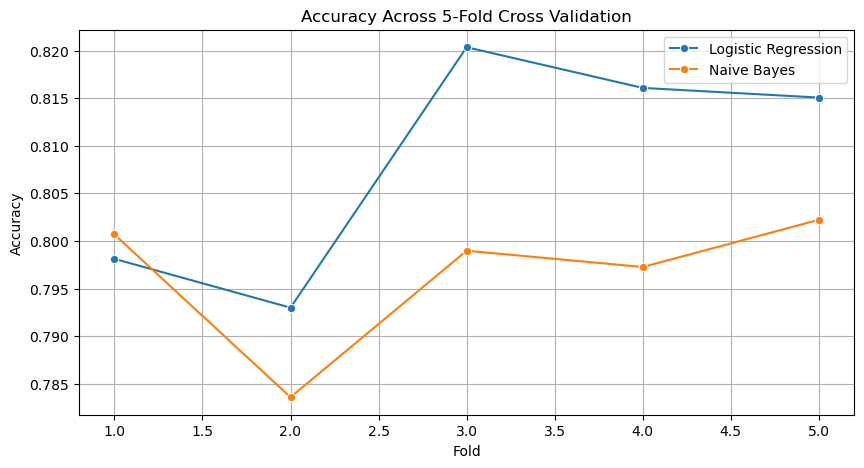

In [81]:
plt.figure(figsize=(10,5))
sns.lineplot(data=lr_df, x="Fold", y="Accuracy", marker='o', label="Logistic Regression")
sns.lineplot(data=nb_df, x="Fold", y="Accuracy", marker='o', label="Naive Bayes")
plt.title("Accuracy Across 5-Fold Cross Validation")
plt.ylabel("Accuracy")
plt.xlabel("Fold")
plt.legend()
plt.grid(True)
plt.show()

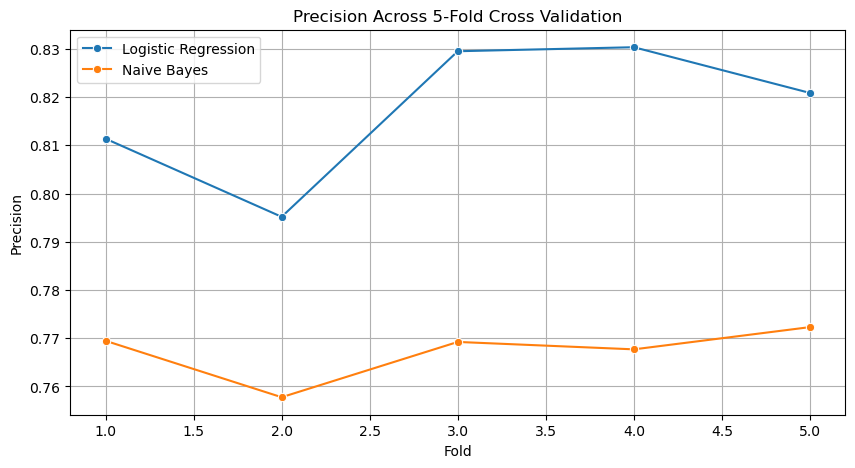

In [82]:
plt.figure(figsize=(10,5))
sns.lineplot(data=lr_df, x="Fold", y="Precision", marker='o', label="Logistic Regression")
sns.lineplot(data=nb_df, x="Fold", y="Precision", marker='o', label="Naive Bayes")
plt.title("Precision Across 5-Fold Cross Validation")
plt.ylabel("Precision")
plt.xlabel("Fold")
plt.legend()
plt.grid(True)
plt.show()

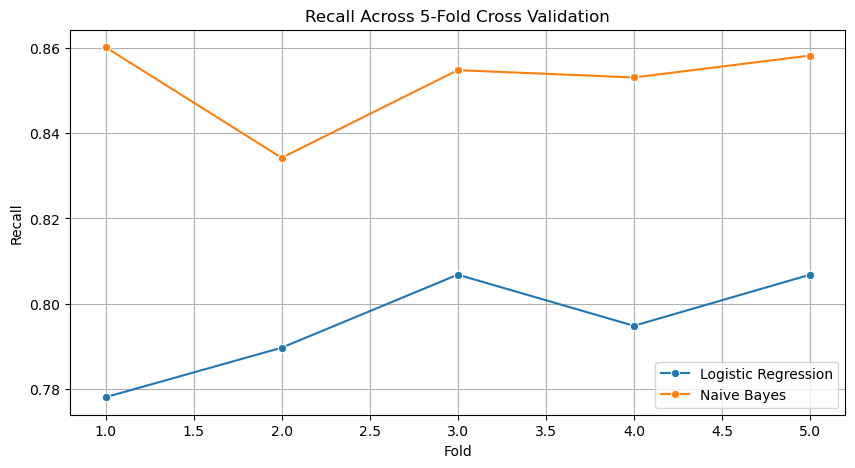

In [83]:
plt.figure(figsize=(10,5))
sns.lineplot(data=lr_df, x="Fold", y="Recall", marker='o', label="Logistic Regression")
sns.lineplot(data=nb_df, x="Fold", y="Recall", marker='o', label="Naive Bayes")
plt.title("Recall Across 5-Fold Cross Validation")
plt.ylabel("Recall")
plt.xlabel("Fold")
plt.legend()
plt.grid(True)
plt.show()

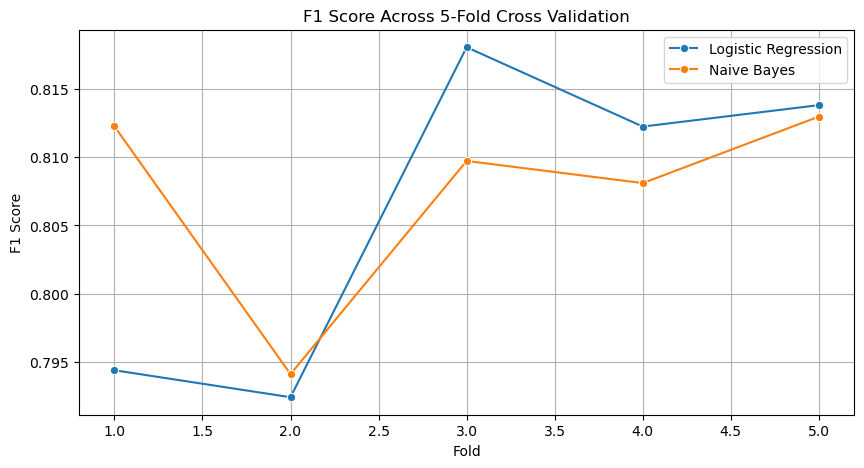

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(data=lr_df, x="Fold", y="F1 Score", marker='o', label="Logistic Regression")
sns.lineplot(data=nb_df, x="Fold", y="F1 Score", marker='o', label="Naive Bayes")
plt.title("F1 Score Across 5-Fold Cross Validation")
plt.ylabel("F1 Score")
plt.xlabel("Fold")
plt.legend()
plt.grid(True)
plt.show()

#### Visualization 2: Average Metric Comparison (Bar Chart)

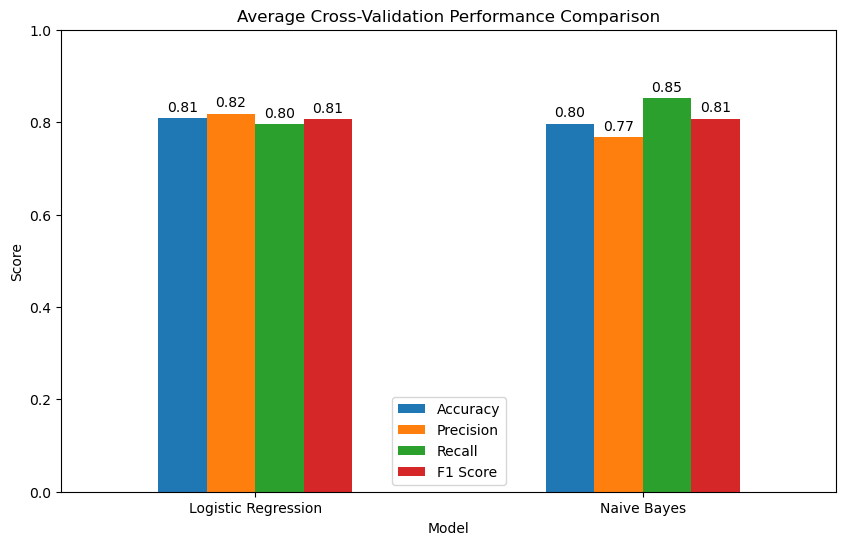

In [86]:
avg_results = cv_results_df.groupby("Model").mean().reset_index()

ax = avg_results.plot(
    x="Model",
    y=["Accuracy", "Precision", "Recall", "F1 Score"],
    kind="bar",
    figsize=(10,6)
)

plt.title("Average Cross-Validation Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)

# Adding value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.show()

#### Visualization 3: Radar Chart

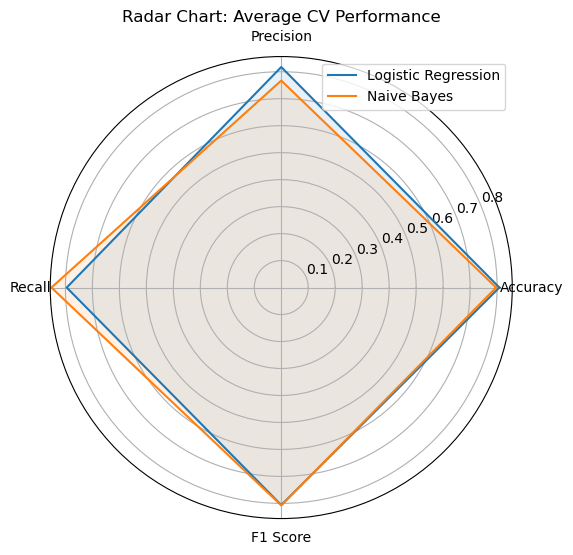

In [88]:
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
lr_means = avg_results[avg_results["Model"]=="Logistic Regression"][metrics].values.flatten()
nb_means = avg_results[avg_results["Model"]=="Naive Bayes"][metrics].values.flatten()

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

lr_means = np.concatenate((lr_means, [lr_means[0]]))
nb_means = np.concatenate((nb_means, [nb_means[0]]))

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, lr_means, label="Logistic Regression")
ax.plot(angles, nb_means, label="Naive Bayes")
ax.fill(angles, lr_means, alpha=0.1)
ax.fill(angles, nb_means, alpha=0.1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
plt.title("Radar Chart: Average CV Performance")
plt.legend(loc="upper right")
plt.show()

## 5.7 Average Cross-Validation Performance Table (5-Fold Mean)

In [90]:
# Round values for clean presentation
avg_results_rounded = avg_results.copy()
avg_results_rounded[["Accuracy", "Precision", "Recall", "F1 Score"]] = \
    avg_results_rounded[["Accuracy", "Precision", "Recall", "F1 Score"]].round(4)

avg_results_rounded

,Model,Fold,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,3.0,0.8085,0.8175,0.7953,0.8062
1,Naive Bayes,3.0,0.7965,0.7673,0.8520,0.8074


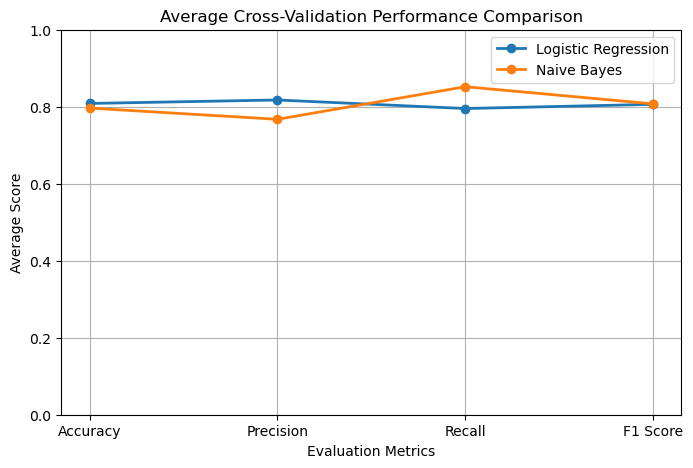

In [91]:
plt.figure(figsize=(8,5))

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for _, row in avg_results_rounded.iterrows():
    plt.plot(
        metrics,
        row[metrics],
        marker='o',
        linewidth=2,
        label=row["Model"]
    )

plt.ylim(0, 1)
plt.xlabel("Evaluation Metrics")
plt.ylabel("Average Score")
plt.title("Average Cross-Validation Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Section 6: Training–Validation Evaluation (Overfitting Analysis)

## 6.1 Create Validation Split from Training Data

In [94]:
from sklearn.model_selection import train_test_split

# Split training data into train and validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("Sub-training set:", X_train_sub.shape)
print("Validation set:", X_val.shape)

Sub-training set: (4675, 5000)
Validation set: (1169, 5000)


## 6.2 Train Models on Sub-Training Data

In [96]:
# Train Logistic Regression
log_reg.fit(X_train_sub, y_train_sub)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [97]:
# Train Naive Bayes
naive_bayes.fit(X_train_sub, y_train_sub)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## 6.3 Evaluate on Training and Validation Sets

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_tr, y_tr, X_v, y_v):
    return {
        "Train Accuracy": accuracy_score(y_tr, model.predict(X_tr)),
        "Validation Accuracy": accuracy_score(y_v, model.predict(X_v)),
        "Train Precision": precision_score(y_tr, model.predict(X_tr)),
        "Validation Precision": precision_score(y_v, model.predict(X_v)),
        "Train Recall": recall_score(y_tr, model.predict(X_tr)),
        "Validation Recall": recall_score(y_v, model.predict(X_v)),
        "Train F1": f1_score(y_tr, model.predict(X_tr)),
        "Validation F1": f1_score(y_v, model.predict(X_v))
    }

lr_train_val = evaluate_model(log_reg, X_train_sub, y_train_sub, X_val, y_val)
nb_train_val = evaluate_model(naive_bayes, X_train_sub, y_train_sub, X_val, y_val)

## 6.4 Training vs Validation Performance Table

In [101]:
train_val_df = pd.DataFrame([
    ["Logistic Regression", 
     lr_train_val["Train Accuracy"], lr_train_val["Validation Accuracy"],
     lr_train_val["Train Precision"], lr_train_val["Validation Precision"],
     lr_train_val["Train Recall"], lr_train_val["Validation Recall"],
     lr_train_val["Train F1"], lr_train_val["Validation F1"]],
    
    ["Naive Bayes", 
     nb_train_val["Train Accuracy"], nb_train_val["Validation Accuracy"],
     nb_train_val["Train Precision"], nb_train_val["Validation Precision"],
     nb_train_val["Train Recall"], nb_train_val["Validation Recall"],
     nb_train_val["Train F1"], nb_train_val["Validation F1"]],
], columns=[
    "Model",
    "Train Accuracy", "Validation Accuracy",
    "Train Precision", "Validation Precision",
    "Train Recall", "Validation Recall",
    "Train F1 Score", "Validation F1 Score"
])

train_val_df.round(4)

,Model,Train Accuracy,Validation Accuracy,Train Precision,Validation Precision,Train Recall,Validation Recall,Train F1 Score,Validation F1 Score
0,Logistic Regression,0.9031,0.7930,0.9104,0.8046,0.8945,0.7744,0.9024,0.7892
1,Naive Bayes,0.8960,0.7648,0.8726,0.7348,0.9278,0.8291,0.8994,0.7791


## 6.5 Visualization 1: Train vs Validation Bar Chart (F1 Score)

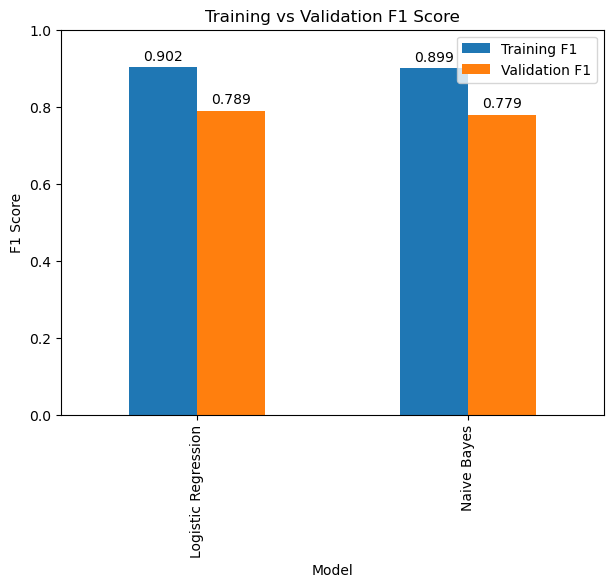

In [103]:
f1_compare = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Training F1": [lr_train_val["Train F1"], nb_train_val["Train F1"]],
    "Validation F1": [lr_train_val["Validation F1"], nb_train_val["Validation F1"]]
})

ax = f1_compare.set_index("Model").plot(
    kind="bar",
    figsize=(7,5)
)

plt.title("Training vs Validation F1 Score")
plt.ylabel("F1 Score")
plt.ylim(0,1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=3)

plt.show()

## 6.6 Visualization 2: Metric-wise Comparison

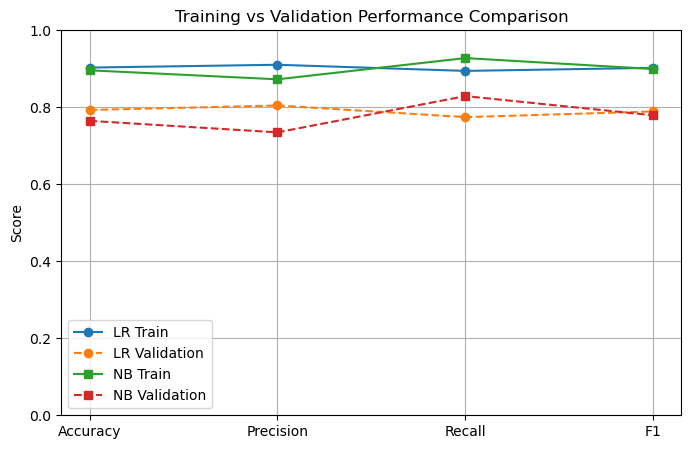

In [105]:
metrics = ["Accuracy", "Precision", "Recall", "F1"]

plt.figure(figsize=(8,5))

# Logistic Regression
plt.plot(metrics,
         [lr_train_val[f"Train {m}"] for m in metrics],
         marker='o', label="LR Train")
plt.plot(metrics,
         [lr_train_val[f"Validation {m}"] for m in metrics],
         marker='o', linestyle='--', label="LR Validation")

# Naive Bayes
plt.plot(metrics,
         [nb_train_val[f"Train {m}"] for m in metrics],
         marker='s', label="NB Train")
plt.plot(metrics,
         [nb_train_val[f"Validation {m}"] for m in metrics],
         marker='s', linestyle='--', label="NB Validation")

plt.title("Training vs Validation Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

# Section 7: Final Evaluation on Test Data

## 7.1 Generate Predictions on Test Data

In [108]:
# Predictions
y_pred_lr_test = log_reg.predict(X_test)
y_pred_nb_test = naive_bayes.predict(X_test)

# Prediction probabilities (for ROC curve)
y_prob_lr_test = log_reg.predict_proba(X_test)[:, 1]
y_prob_nb_test = naive_bayes.predict_proba(X_test)[:, 1]

## 7.2 Evaluation Metrics Table

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr_test),
        accuracy_score(y_test, y_pred_nb_test)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr_test),
        precision_score(y_test, y_pred_nb_test)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr_test),
        recall_score(y_test, y_pred_nb_test)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr_test),
        f1_score(y_test, y_pred_nb_test)
    ]
})

test_results_rounded = test_results.round(4)
test_results_rounded

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8111,0.8264,0.788,0.8067
1,Naive Bayes,0.8015,0.7653,0.870,0.8143


## 7.3 Confusion Matrix Visualization

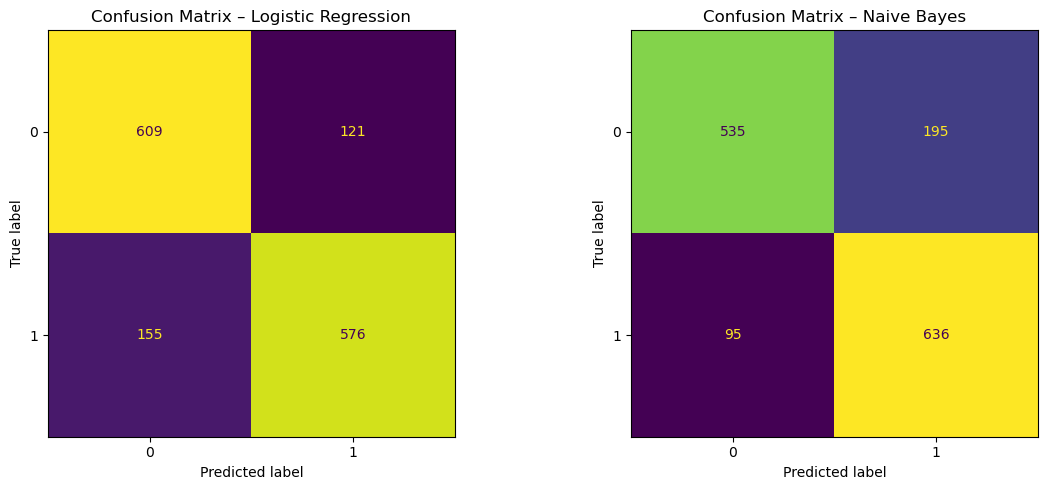

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr_test)
ConfusionMatrixDisplay(cm_lr).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Confusion Matrix – Logistic Regression")

# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb_test)
ConfusionMatrixDisplay(cm_nb).plot(ax=axes[1], colorbar=False)
axes[1].set_title("Confusion Matrix – Naive Bayes")

plt.tight_layout()
plt.show()

## 7.4 ROC Curve Comparison

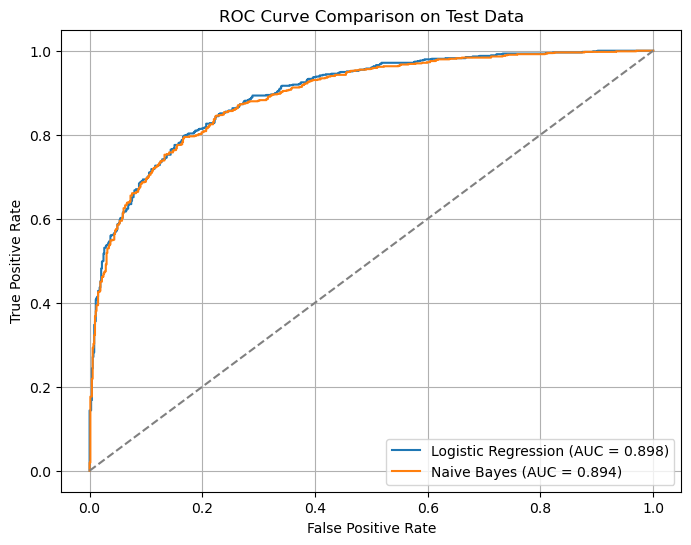

In [114]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb_test)

auc_lr = auc(fpr_lr, tpr_lr)
auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.title("ROC Curve Comparison on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

## 7.5 Bar Chart of Test Metrics

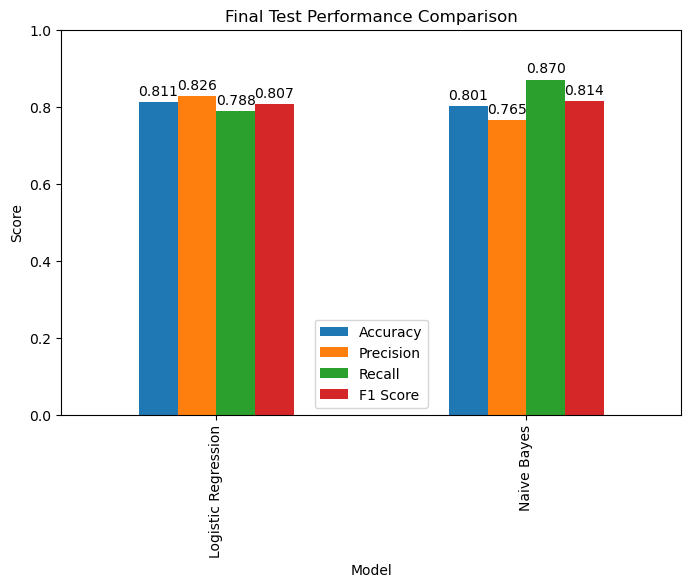

In [116]:
ax = test_results_rounded.set_index("Model").plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Final Test Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=3)

plt.show()

# Section 7: Hyperparameter Tuning and Performance Enhancement

## 7.1 Define Hyperparameter Grids

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression hyperparameters
lr_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["liblinear"]
}

# Naive Bayes hyperparameters
nb_param_grid = {
    "alpha": [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
}

## 7.2 Grid Search for Logistic Regression

In [121]:
lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)

best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Parameters:", lr_grid.best_params_)

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


## 7.3 Grid Search for Naive Bayes

In [123]:
nb_grid = GridSearchCV(
    MultinomialNB(),
    nb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

nb_grid.fit(X_train, y_train)

best_nb = nb_grid.best_estimator_
print("Best Naive Bayes Parameters:", nb_grid.best_params_)

Best Naive Bayes Parameters: {'alpha': 0.5}


## 7.4 Predictions (Before vs After Tuning)

In [125]:
# Before tuning (already trained earlier)
y_pred_lr_untuned = log_reg.predict(X_test)
y_pred_nb_untuned = naive_bayes.predict(X_test)

# After tuning
y_pred_lr_tuned = best_lr.predict(X_test)
y_pred_nb_tuned = best_nb.predict(X_test)

## 7.5 Evaluation Table (Before vs After)

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred)
    ]

results_tuning = pd.DataFrame({
    "Model": [
        "Logistic Regression (Before)",
        "Logistic Regression (After)",
        "Naive Bayes (Before)",
        "Naive Bayes (After)"
    ],
    "Accuracy": [
        *evaluate_model(y_test, y_pred_lr_untuned)[:1],
        *evaluate_model(y_test, y_pred_lr_tuned)[:1],
        *evaluate_model(y_test, y_pred_nb_untuned)[:1],
        *evaluate_model(y_test, y_pred_nb_tuned)[:1],
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr_untuned),
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_nb_untuned),
        precision_score(y_test, y_pred_nb_tuned)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr_untuned),
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_nb_untuned),
        recall_score(y_test, y_pred_nb_tuned)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr_untuned),
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_nb_untuned),
        f1_score(y_test, y_pred_nb_tuned)
    ]
})

results_tuning_rounded = results_tuning.round(4)
results_tuning_rounded

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Before),0.8111,0.8264,0.7880,0.8067
1,Logistic Regression (After),0.8474,0.8757,0.8098,0.8415
2,Naive Bayes (Before),0.8015,0.7653,0.8700,0.8143
3,Naive Bayes (After),0.8186,0.7957,0.8577,0.8255


## 7.6 Bar Chart: Before vs After Tuning

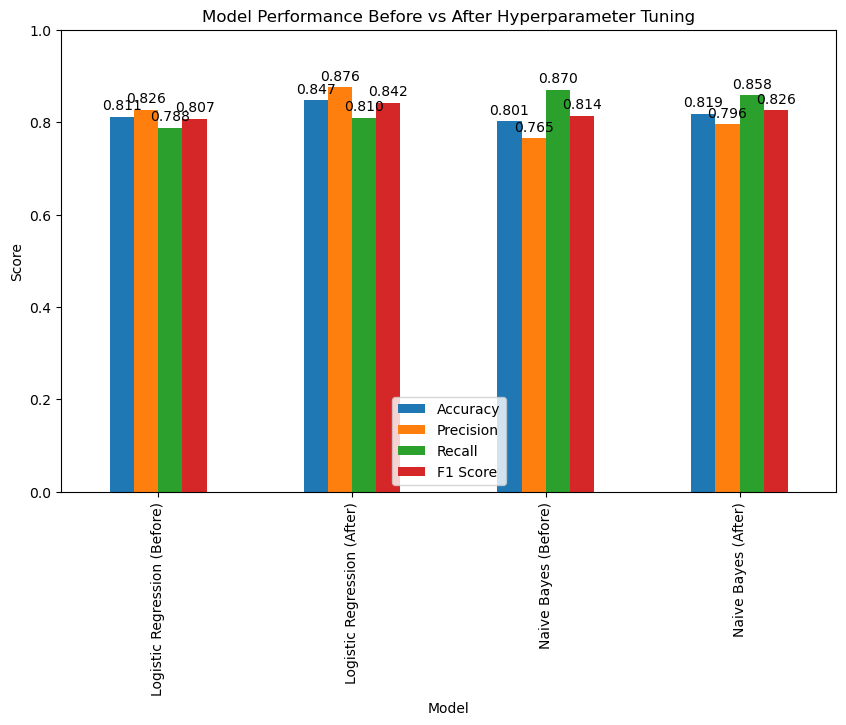

In [232]:
ax = results_tuning_rounded.set_index("Model").plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Model Performance Before vs After Hyperparameter Tuning")
plt.ylabel("Score")
plt.ylim(0,1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=3)

plt.show()

## 7.7 Heatmap: Tuning Impact

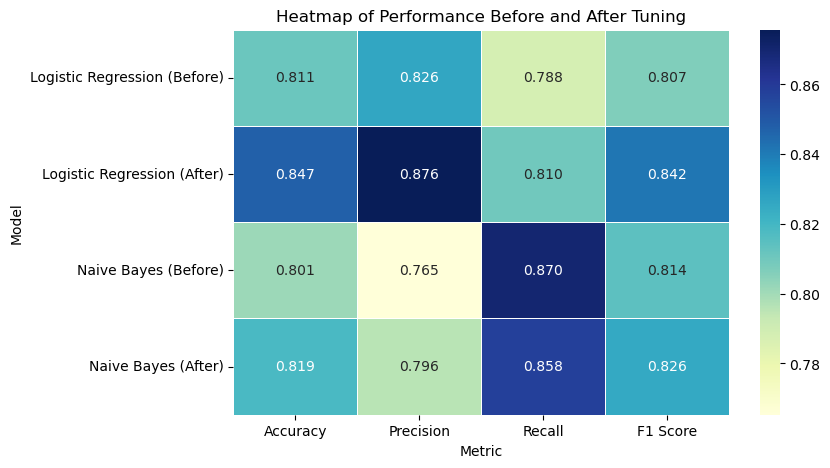

In [131]:
plt.figure(figsize=(8,5))
sns.heatmap(
    results_tuning_rounded.set_index("Model"),
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Heatmap of Performance Before and After Tuning")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.show()

## 7.8 Final Tuned Models Comparison Only

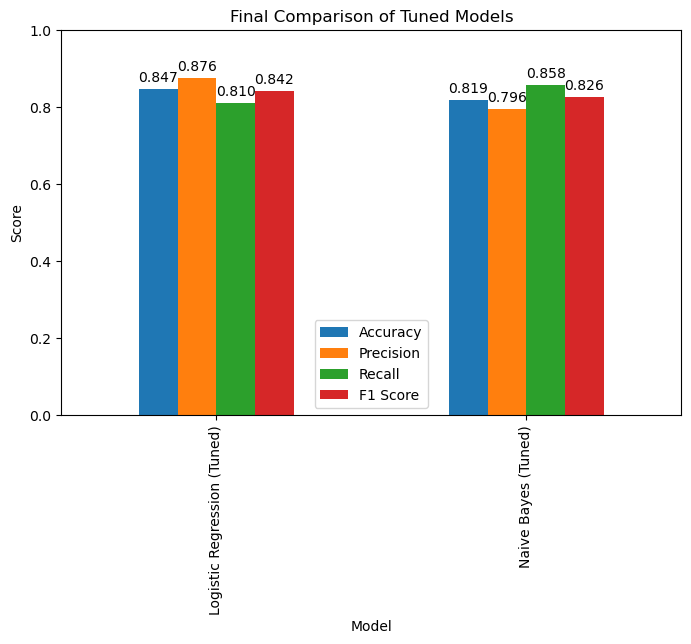

In [133]:
tuned_only = results_tuning_rounded.iloc[[1,3]].copy()
tuned_only["Model"] = ["Logistic Regression (Tuned)", "Naive Bayes (Tuned)"]
tuned_only = tuned_only.set_index("Model")

ax = tuned_only.plot(kind="bar", figsize=(8,5))
plt.title("Final Comparison of Tuned Models")
plt.ylabel("Score")
plt.ylim(0,1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=3)

plt.show()

## 7.9 ROC Curve: Tuned vs Untuned (Both Models)

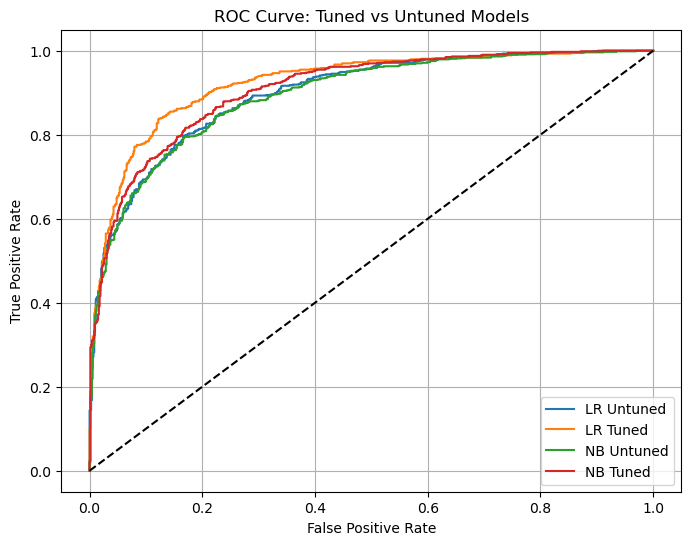

In [135]:
from sklearn.metrics import roc_curve, auc

# Probabilities
y_prob_lr_untuned = log_reg.predict_proba(X_test)[:,1]
y_prob_lr_tuned = best_lr.predict_proba(X_test)[:,1]

y_prob_nb_untuned = naive_bayes.predict_proba(X_test)[:,1]
y_prob_nb_tuned = best_nb.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,6))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob_lr_untuned)
plt.plot(fpr, tpr, label="LR Untuned")

fpr, tpr, _ = roc_curve(y_test, y_prob_lr_tuned)
plt.plot(fpr, tpr, label="LR Tuned")

# Naive Bayes
fpr, tpr, _ = roc_curve(y_test, y_prob_nb_untuned)
plt.plot(fpr, tpr, label="NB Untuned")

fpr, tpr, _ = roc_curve(y_test, y_prob_nb_tuned)
plt.plot(fpr, tpr, label="NB Tuned")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve: Tuned vs Untuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Section 8: Final Tuned Model Evaluation (Tuned Models Only)

## 8.1 Generate Predictions & Probabilities

In [138]:
# Predictions
y_pred_lr_final = best_lr.predict(X_test)
y_pred_nb_final = best_nb.predict(X_test)

# Probabilities
y_prob_lr_final = best_lr.predict_proba(X_test)[:,1]
y_prob_nb_final = best_nb.predict_proba(X_test)[:,1]

## 8.2 Classification Reports

In [140]:
from sklearn.metrics import classification_report

print("Classification Report – Logistic Regression (Tuned)\n")
print(classification_report(y_test, y_pred_lr_final))

print("\nClassification Report – Naive Bayes (Tuned)\n")
print(classification_report(y_test, y_pred_nb_final))

Classification Report – Logistic Regression (Tuned)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       730
           1       0.88      0.81      0.84       731

    accuracy                           0.85      1461
   macro avg       0.85      0.85      0.85      1461
weighted avg       0.85      0.85      0.85      1461


Classification Report – Naive Bayes (Tuned)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       730
           1       0.80      0.86      0.83       731

    accuracy                           0.82      1461
   macro avg       0.82      0.82      0.82      1461
weighted avg       0.82      0.82      0.82      1461



## 8.3 Confusion Matrices

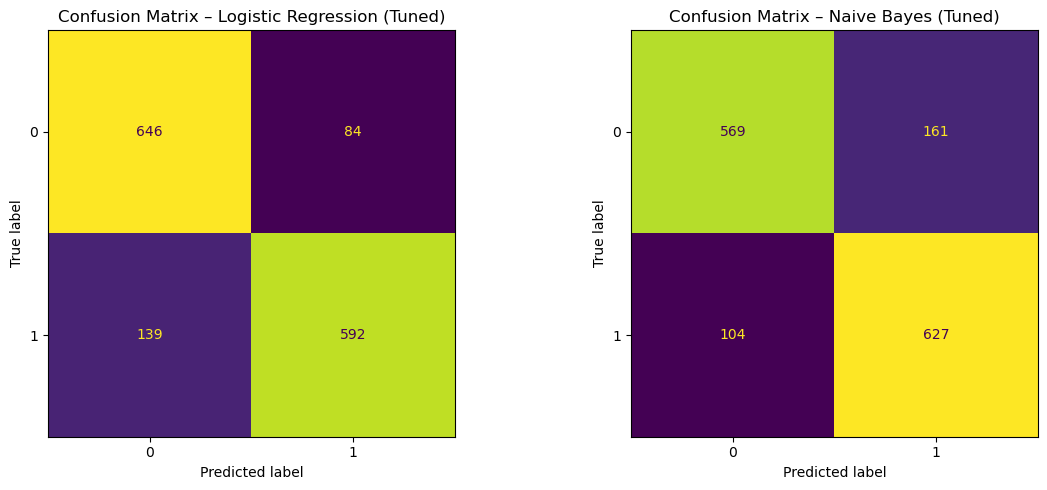

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(12,5))

cm_lr = confusion_matrix(y_test, y_pred_lr_final)
ConfusionMatrixDisplay(cm_lr).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Confusion Matrix – Logistic Regression (Tuned)")

cm_nb = confusion_matrix(y_test, y_pred_nb_final)
ConfusionMatrixDisplay(cm_nb).plot(ax=axes[1], colorbar=False)
axes[1].set_title("Confusion Matrix – Naive Bayes (Tuned)")

plt.tight_layout()
plt.show()

## 8.4 ROC Curve

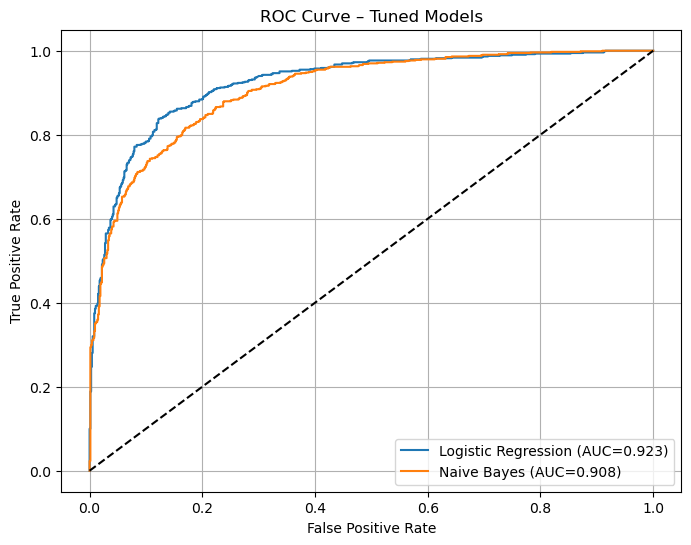

In [144]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_final)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb_final)

auc_lr = auc(fpr_lr, tpr_lr)
auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={auc_nb:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve – Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

## 8.5 Probability Distribution (Confidence Analysis)

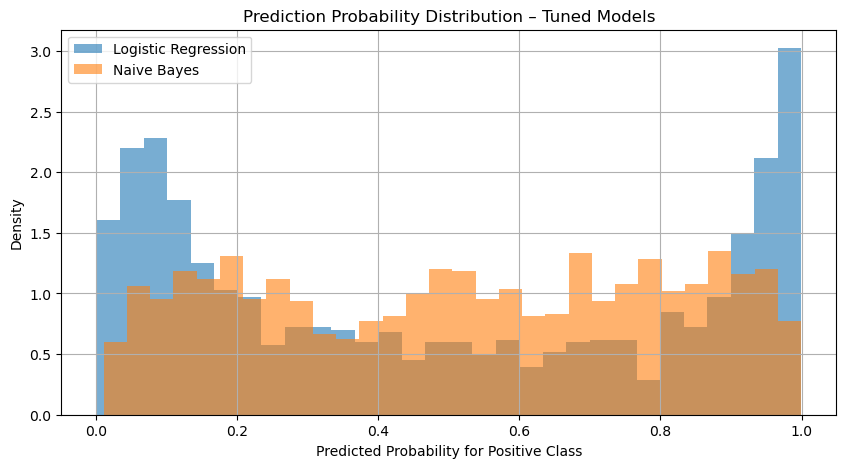

In [146]:
plt.figure(figsize=(10,5))
plt.hist(y_prob_lr_final, bins=30, alpha=0.6, label="Logistic Regression", density=True)
plt.hist(y_prob_nb_final, bins=30, alpha=0.6, label="Naive Bayes", density=True)
plt.title("Prediction Probability Distribution – Tuned Models")
plt.xlabel("Predicted Probability for Positive Class")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

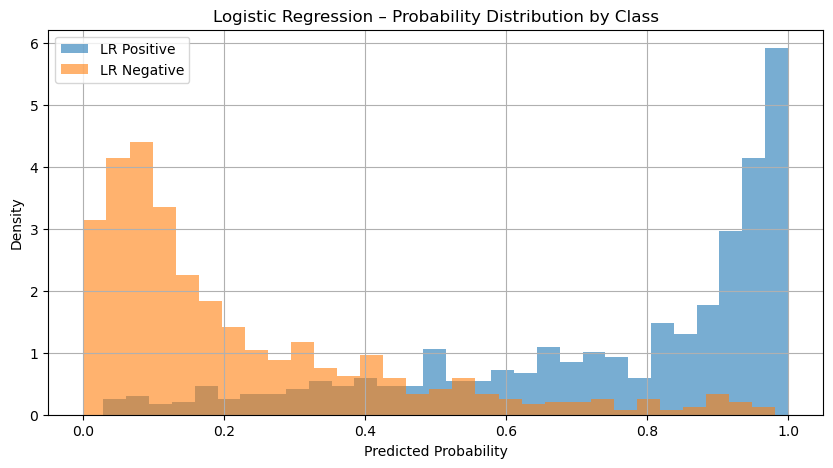

In [147]:
plt.figure(figsize=(10,5))
plt.hist(y_prob_lr_final[y_test==1], bins=30, alpha=0.6, label="LR Positive", density=True)
plt.hist(y_prob_lr_final[y_test==0], bins=30, alpha=0.6, label="LR Negative", density=True)
plt.title("Logistic Regression – Probability Distribution by Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

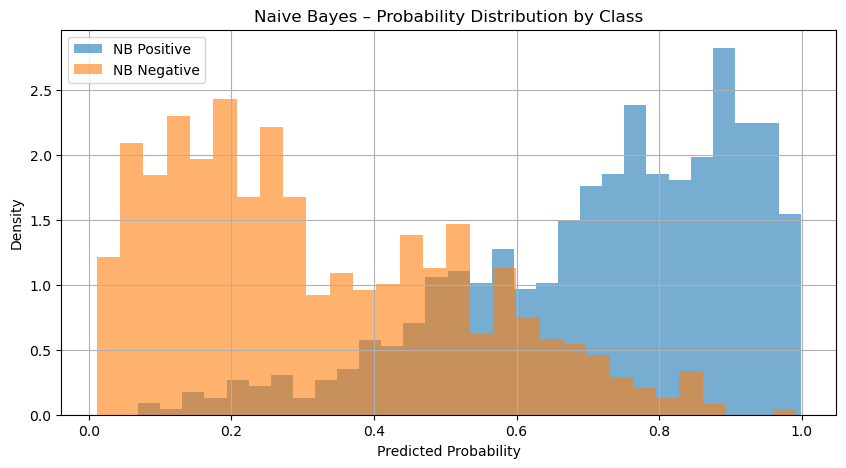

In [148]:
plt.figure(figsize=(10,5))
plt.hist(y_prob_nb_final[y_test==1], bins=30, alpha=0.6, label="NB Positive", density=True)
plt.hist(y_prob_nb_final[y_test==0], bins=30, alpha=0.6, label="NB Negative", density=True)
plt.title("Naive Bayes – Probability Distribution by Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Section 9: Model in Action – Testing with New Text Data

## 9.1 Individual Text Prediction (Interactive)

In [151]:
def predict_texts(text_list):
    """
    Predict sentiment (or label) for a list of texts using Logistic Regression and Naive Bayes.
    Outputs text, predictions, and probabilities in a neat format.
    """
    print(f"{'Text':<60} | {'LR Pred':<8} | {'LR Prob':<8} | {'NB Pred':<8} | {'NB Prob':<8}")
    print("-" * 105)
    
    for text in text_list:
        # Clean the text
        cleaned = clean_text(text)
        
        # Transform using the trained TF-IDF vectorizer
        X_input = tfidf.transform([cleaned])
        
        # Predictions
        lr_pred = best_lr.predict(X_input)[0]
        nb_pred = best_nb.predict(X_input)[0]
        
        # Probabilities (assuming positive class is 1)
        lr_prob = best_lr.predict_proba(X_input)[0,1]
        nb_prob = best_nb.predict_proba(X_input)[0,1]
        
        # Print formatted output
        print(f"{text[:57]:<60} | {lr_pred:<8} | {lr_prob:.3f}   | {nb_pred:<8} | {nb_prob:.3f}")

# Example usage with 3 texts
texts = [
    "The stock market is looking very promising today!",
    "I expect a significant downturn in the market tomorrow.",
    "Investors are worried about the upcoming economic report."
]

predict_texts(texts)

Text                                                         | LR Pred  | LR Prob  | NB Pred  | NB Prob 
---------------------------------------------------------------------------------------------------------
The stock market is looking very promising today!            | 1        | 0.723   | 1        | 0.672
I expect a significant downturn in the market tomorrow.      | 1        | 0.651   | 1        | 0.542
Investors are worried about the upcoming economic report.    | 0        | 0.411   | 0        | 0.383
